In [159]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

In [160]:
file = open("DS1_Rural.pkl",'rb')
ds1_rural = pickle.load(file)

In [161]:
ds1_rural.head()

,Altitude,Distance (km),near,bAzi,bEle,RSRP,SINR,Transmitted Power,Path Loss
0,659.2,1.299024,1,-48.75,10,-79,33.178423,61.93,140.93
1,659.2,1.299024,1,-56.25,10,-79,32.356748,61.93,140.93
2,659.2,1.299024,1,-56.25,10,-82,33.126863,61.93,143.93
3,659.2,1.299024,1,-48.75,10,-80,33.326711,61.93,141.93
4,659.2,1.299024,1,-56.25,10,-81,33.492471,61.93,142.93


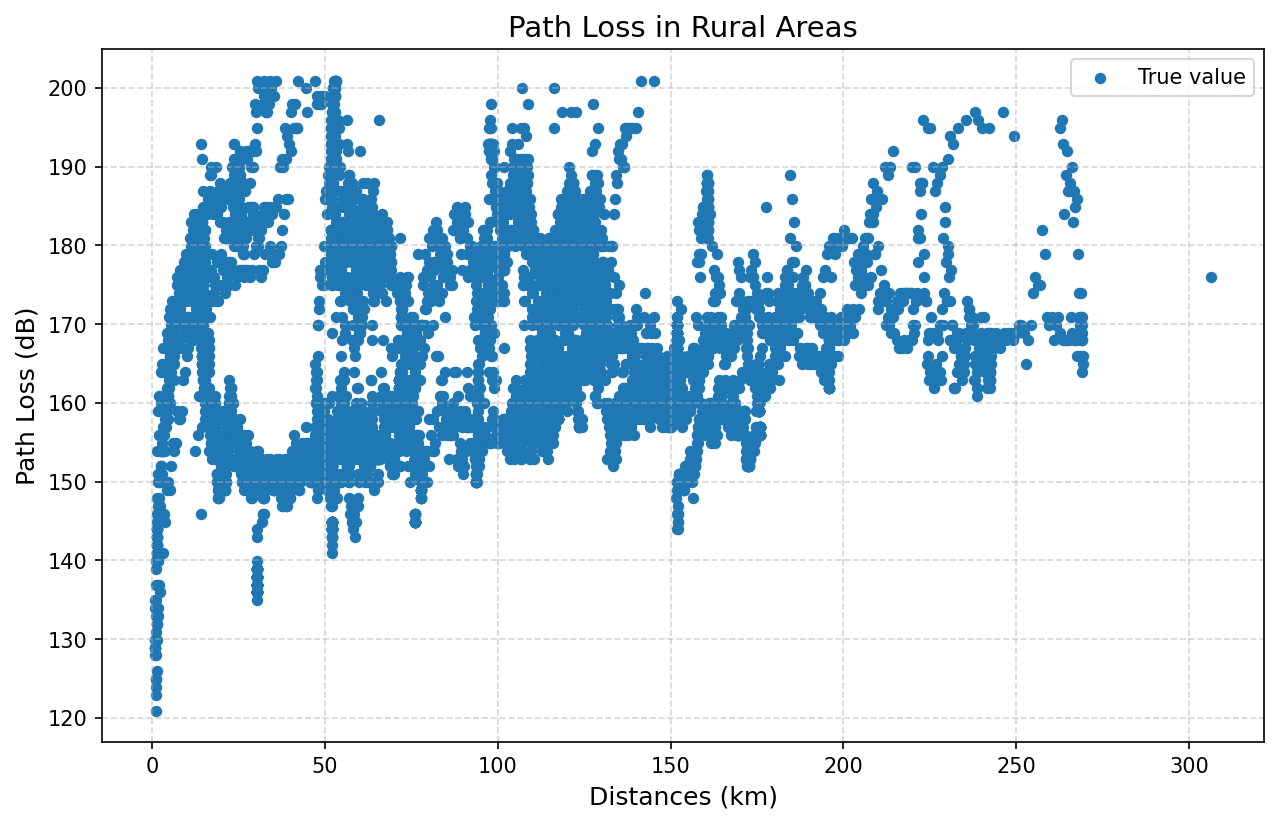

In [162]:
plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(ds1_rural['Distance (km)'], ds1_rural['Path Loss'], marker='o', s=20, label='True value')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Rural Areas', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = ds1_rural.iloc[:, :-1]  # Features
y = ds1_rural.iloc[:, -1]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

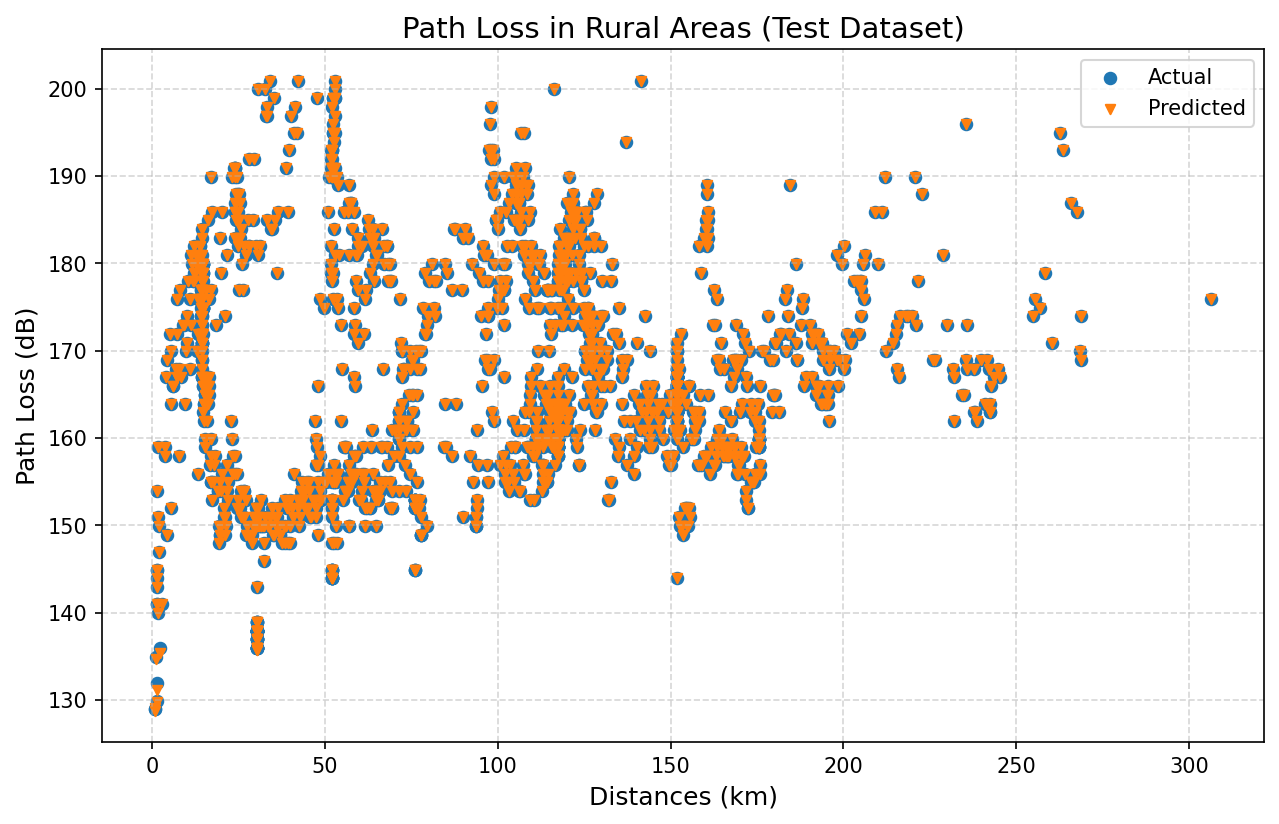

In [164]:
_, X_test, _, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(X_test[:,1],y_test,label='Actual', marker='o', s=30)
plt.scatter(X_test[:,1],y_pred,label='Predicted', marker='v', s=20)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Rural Areas (Test Dataset)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

In [165]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a RF Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors = []
errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a XGB Model on the training data
rf_model = xgb.XGBRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])



# Train a MLPRegressor model on the training data
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100, 50), activation='relu', solver='adam', max_iter=100)
mlp_model.fit(X_train, y_train/100)
# Predict the target values for the testing features
y_pred = mlp_model.predict(X_test)

errors.append([mean_absolute_error(y_test/100,y_pred), np.sqrt(mean_squared_error(y_test/100, y_pred)),
  mean_absolute_percentage_error(y_test/100,y_pred)])

# Train an SVM model on the training data
svm_model = SVR(kernel='rbf')  # Specify the kernel type ('rbf' for radial basis function)
svm_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = svm_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a KNN model on the training data
knn_model = KNeighborsRegressor(n_neighbors=5)  # Specify the number of neighbors (e.g., 5)
knn_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = knn_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

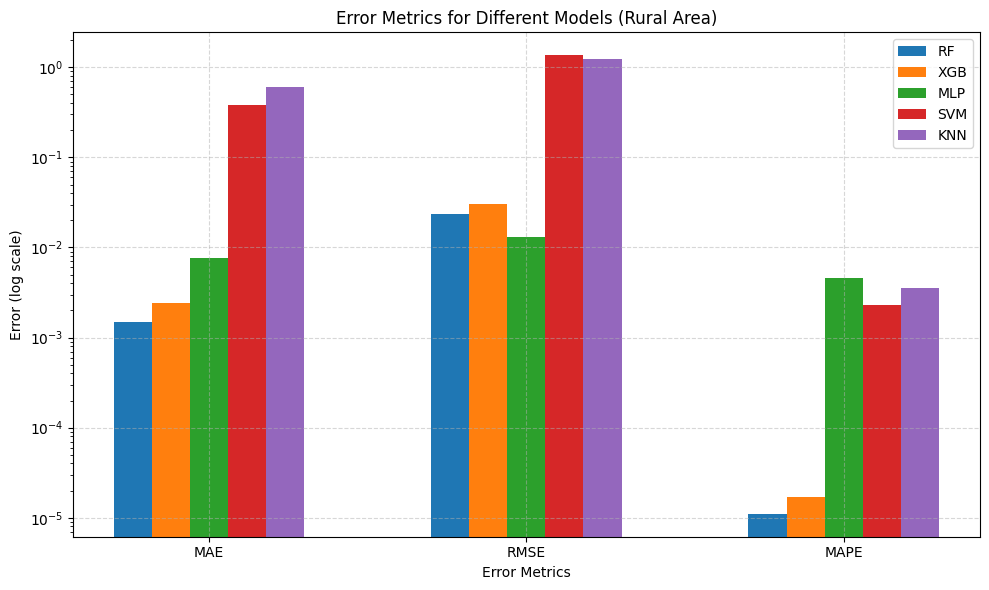

In [166]:
#Error metrics
error_metrics = np.array(errors)

# Define models and error metric names
models = ['RF', 'XGB', 'MLP', 'SVM', 'KNN']
metrics = ['MAE', 'RMSE', 'MAPE']

# Transpose error_metrics array
error_metrics_transposed = error_metrics.T

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.12
index = np.arange(len(metrics))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(index + i * bar_width, error_metrics_transposed[:, i], bar_width, label=model, align='center')

# Set labels and title
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error (log scale)')
ax.set_title('Error Metrics for Different Models (Rural Area)')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.grid(True, linestyle='--', alpha=0.5)
# Use a logarithmic scale for y-axis
ax.set_yscale('log')

plt.tight_layout()
plt.show()


# DS1- Subarban #

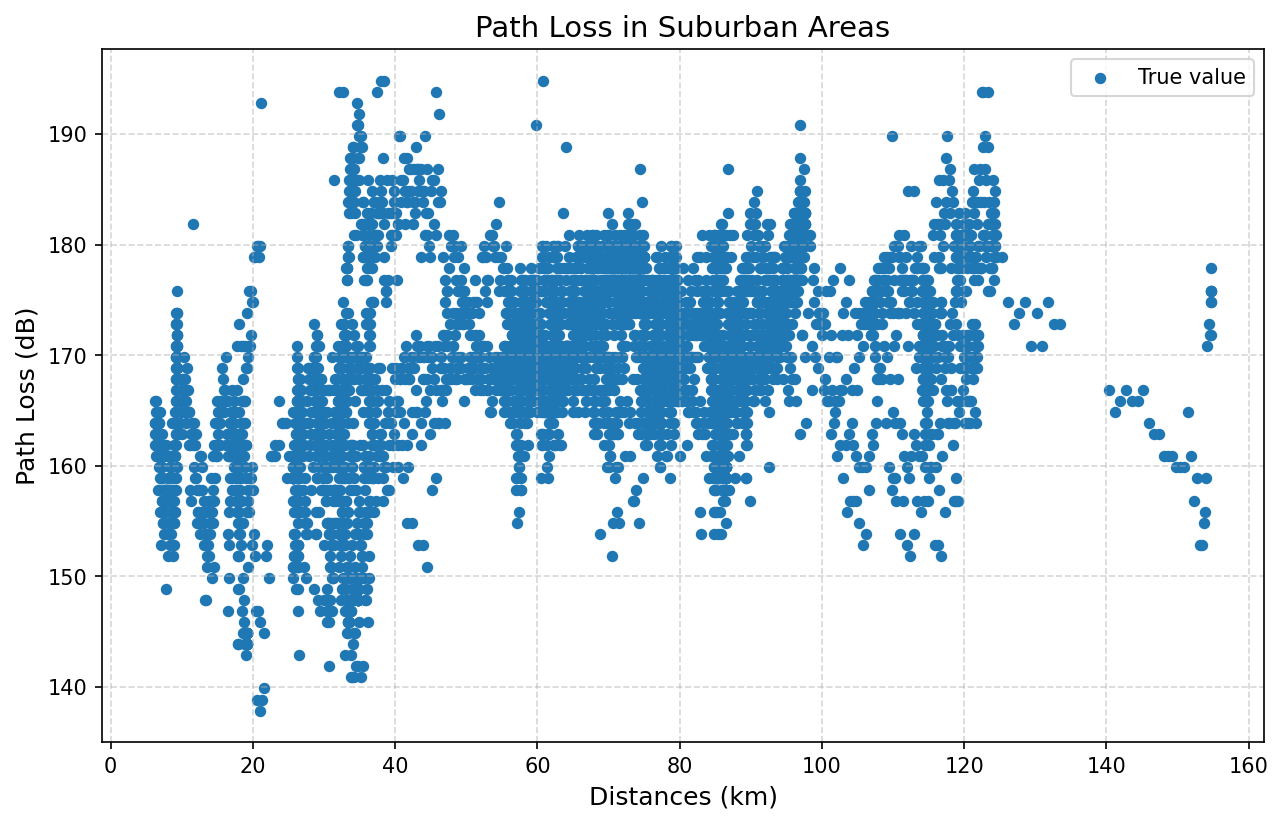

In [167]:
file = open("DS1_Suburban.pkl",'rb')
ds1_rural = pickle.load(file)

plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(ds1_rural['Distance (km)'], ds1_rural['Path Loss'], marker='o', s=20, label='True value')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Suburban Areas', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

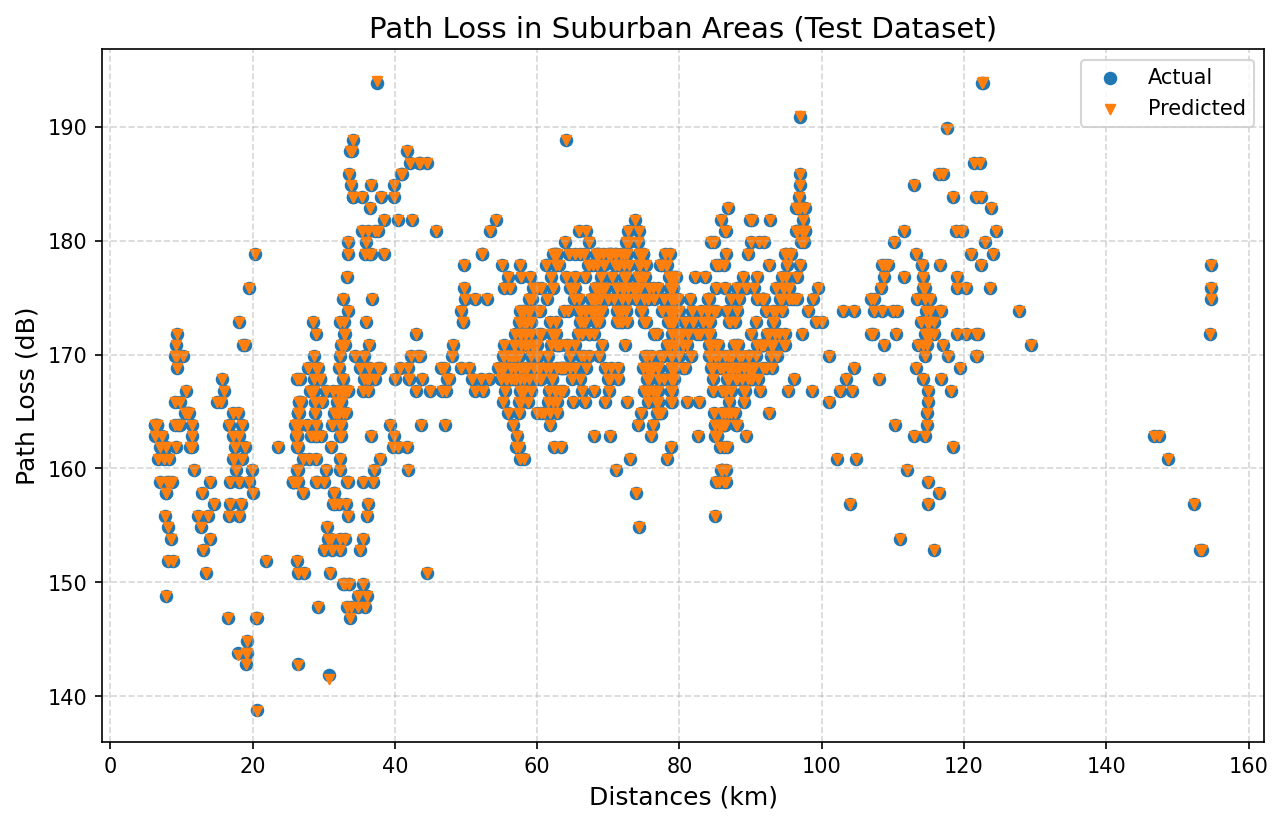

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = ds1_rural.iloc[:, :-1]  # Features
y = ds1_rural.iloc[:, -1]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

_, X_test, _, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(X_test[:,1],y_test,label='Actual', marker='o', s=30)
plt.scatter(X_test[:,1],y_pred,label='Predicted', marker='v', s=20)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Suburban Areas (Test Dataset)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

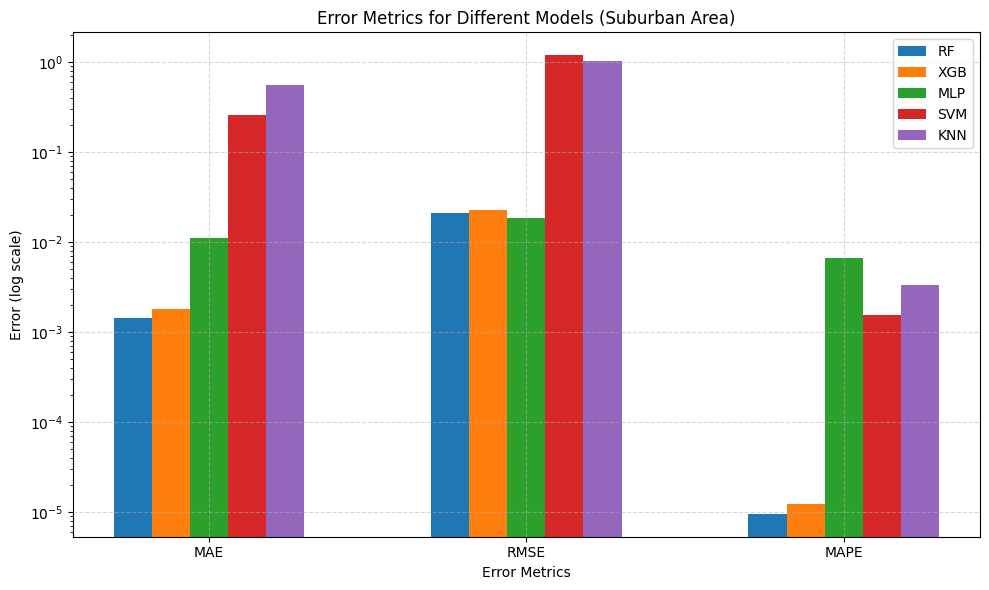

In [169]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a RF Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors = []
errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a XGB Model on the training data
rf_model = xgb.XGBRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])



# Train a MLPRegressor model on the training data
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100, 50), activation='relu', solver='adam', max_iter=100)
mlp_model.fit(X_train, y_train/100)
# Predict the target values for the testing features
y_pred = mlp_model.predict(X_test)

errors.append([mean_absolute_error(y_test/100,y_pred), np.sqrt(mean_squared_error(y_test/100, y_pred)),
  mean_absolute_percentage_error(y_test/100,y_pred)])

# Train an SVM model on the training data
svm_model = SVR(kernel='rbf')  # Specify the kernel type ('rbf' for radial basis function)
svm_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = svm_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a KNN model on the training data
knn_model = KNeighborsRegressor(n_neighbors=5)  # Specify the number of neighbors (e.g., 5)
knn_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = knn_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

#Error metrics
error_metrics = np.array(errors)

# Define models and error metric names
models = ['RF', 'XGB', 'MLP', 'SVM', 'KNN']
metrics = ['MAE', 'RMSE', 'MAPE']

# Transpose error_metrics array
error_metrics_transposed = error_metrics.T

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.12
index = np.arange(len(metrics))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(index + i * bar_width, error_metrics_transposed[:, i], bar_width, label=model, align='center')

# Set labels and title
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error (log scale)')
ax.set_title('Error Metrics for Different Models (Suburban Area)')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.grid(True, linestyle='--', alpha=0.5)
# Use a logarithmic scale for y-axis
ax.set_yscale('log')

plt.tight_layout()
plt.show()


# DS1 Urban Area #

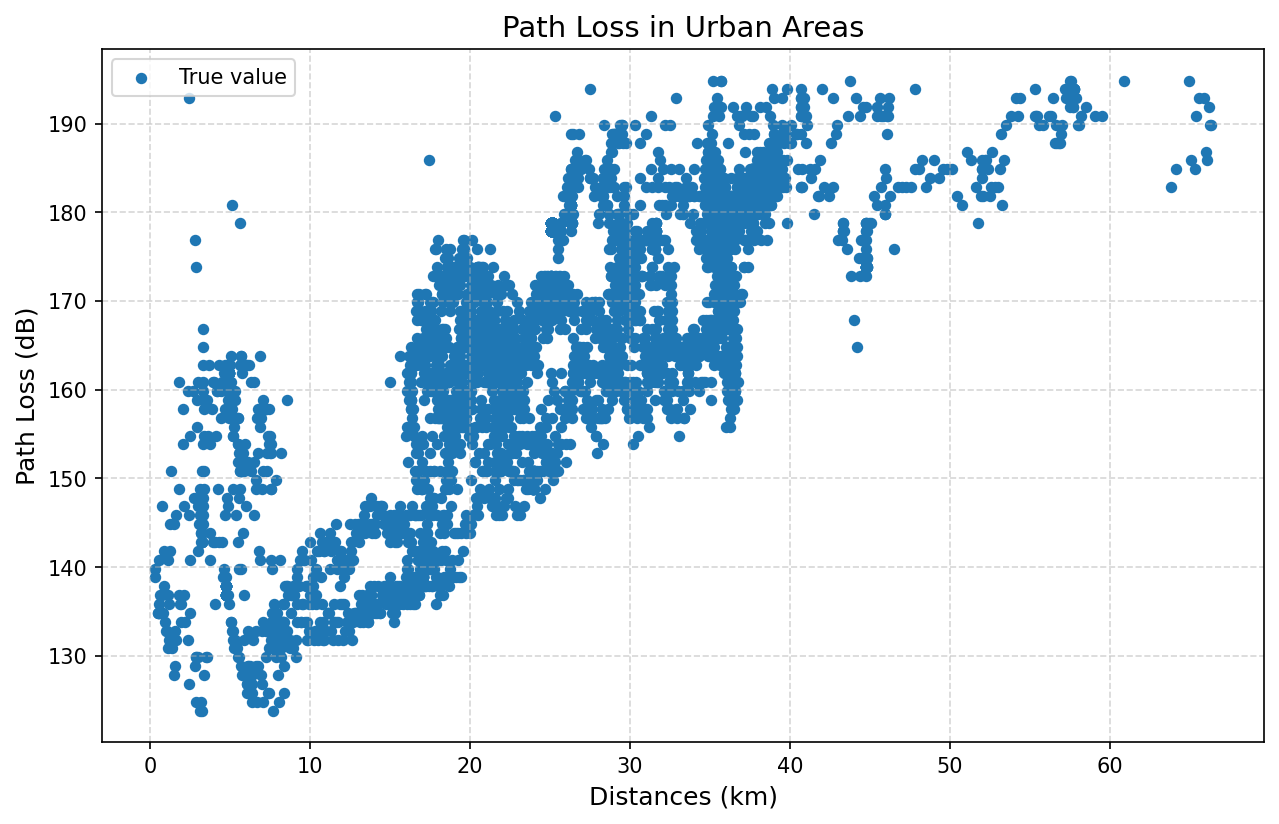

In [170]:
file = open("DS1_Urban.pkl",'rb')
ds1_rural = pickle.load(file)

plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(ds1_rural['Distance (km)'], ds1_rural['Path Loss'], marker='o', s=20, label='True value')

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Urban Areas', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

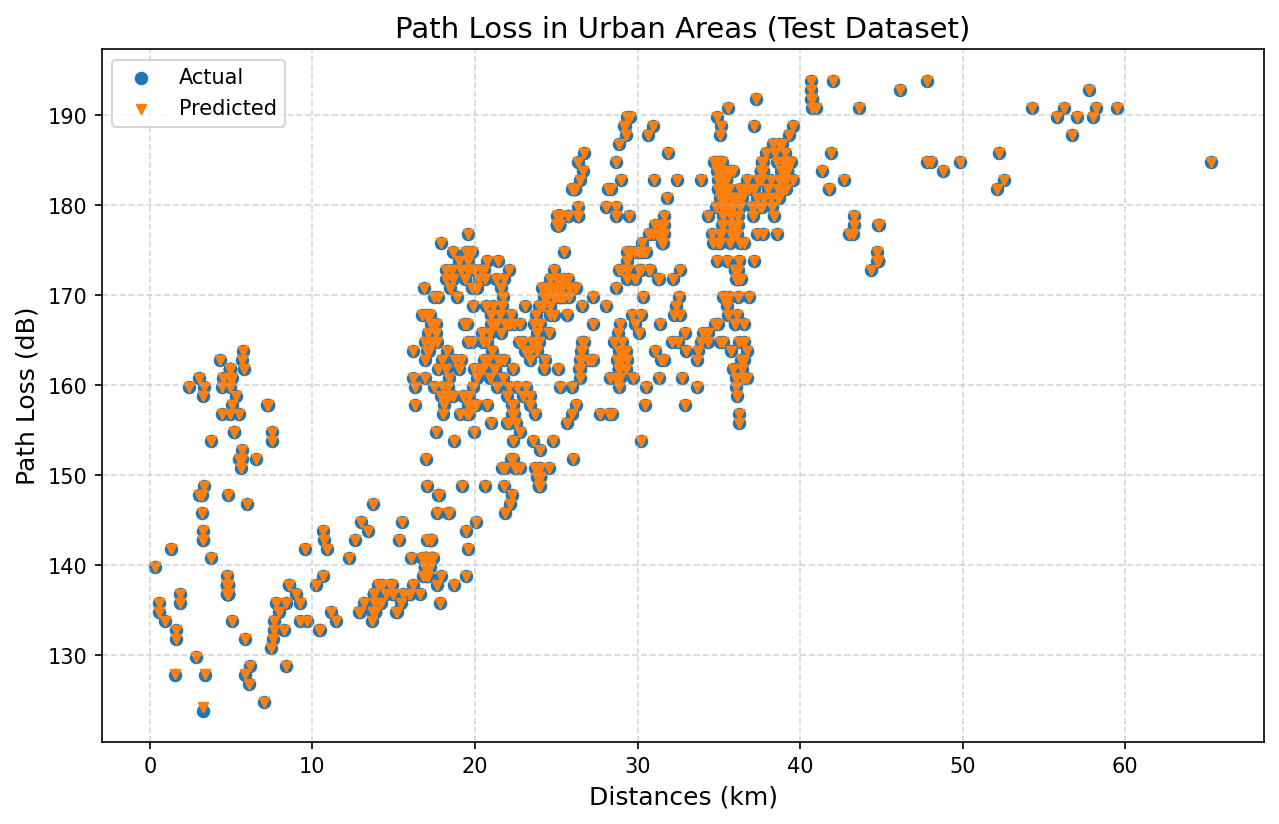

In [171]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pandas as pd


X = ds1_rural.iloc[:, :-1]  # Features
y = ds1_rural.iloc[:, -1]  # Target

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

_, X_test, _, y_test = train_test_split(X.values, y, test_size=0.2, random_state=42)

plt.figure(figsize=(10, 6), dpi=150)

plt.scatter(X_test[:,1],y_test,label='Actual', marker='o', s=30)
plt.scatter(X_test[:,1],y_pred,label='Predicted', marker='v', s=20)

plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('Distances (km)', fontsize=12)
plt.ylabel('Path Loss (dB)', fontsize=12)
plt.title('Path Loss in Urban Areas (Test Dataset)', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.show()

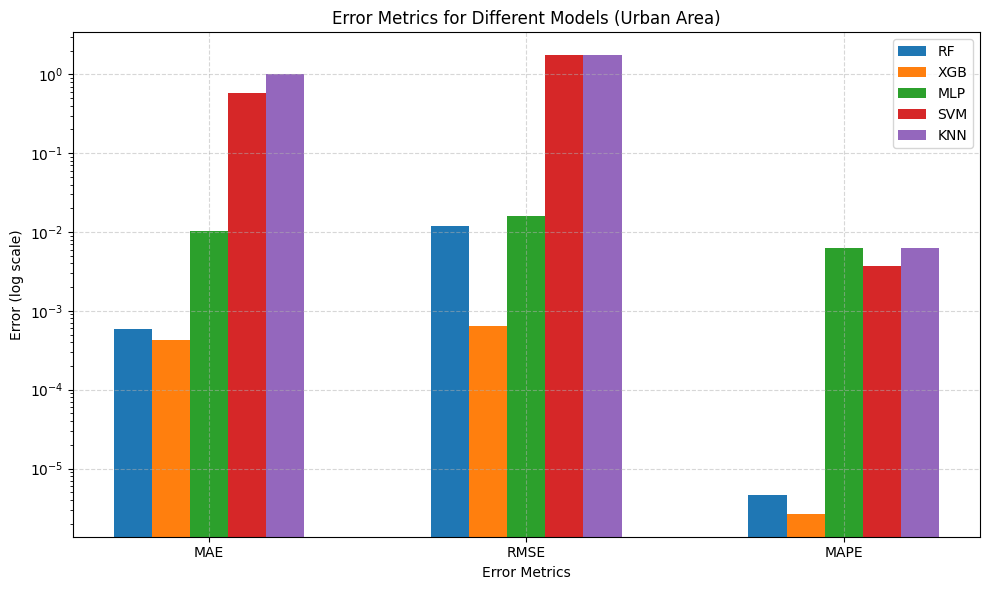

In [172]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import xgboost as xgb
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Split the normalized features and target into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Train a RF Model on the training data
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors = []
errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a XGB Model on the training data
rf_model = xgb.XGBRegressor()
rf_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = rf_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])



# Train a MLPRegressor model on the training data
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 100, 50), activation='relu', solver='adam', max_iter=100)
mlp_model.fit(X_train, y_train/100)
# Predict the target values for the testing features
y_pred = mlp_model.predict(X_test)

errors.append([mean_absolute_error(y_test/100,y_pred), np.sqrt(mean_squared_error(y_test/100, y_pred)),
  mean_absolute_percentage_error(y_test/100,y_pred)])

# Train an SVM model on the training data
svm_model = SVR(kernel='rbf')  # Specify the kernel type ('rbf' for radial basis function)
svm_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = svm_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

# Train a KNN model on the training data
knn_model = KNeighborsRegressor(n_neighbors=5)  # Specify the number of neighbors (e.g., 5)
knn_model.fit(X_train, y_train)
# Predict the target values for the testing features
y_pred = knn_model.predict(X_test)

errors.append([mean_absolute_error(y_test,y_pred), np.sqrt(mean_squared_error(y_test, y_pred)),
  mean_absolute_percentage_error(y_test,y_pred)])

#Error metrics
error_metrics = np.array(errors)

# Define models and error metric names
models = ['RF', 'XGB', 'MLP', 'SVM', 'KNN']
metrics = ['MAE', 'RMSE', 'MAPE']

# Transpose error_metrics array
error_metrics_transposed = error_metrics.T

fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.12
index = np.arange(len(metrics))

# Plot bars for each model
for i, model in enumerate(models):
    ax.bar(index + i * bar_width, error_metrics_transposed[:, i], bar_width, label=model, align='center')

# Set labels and title
ax.set_xlabel('Error Metrics')
ax.set_ylabel('Error (log scale)')
ax.set_title('Error Metrics for Different Models (Urban Area)')
ax.set_xticks(index + bar_width * (len(models) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.grid(True, linestyle='--', alpha=0.5)
# Use a logarithmic scale for y-axis
ax.set_yscale('log')

plt.tight_layout()
plt.show()
